This notebook is an example of what you can achieve with Jupyter, Pandas, and SciKit Learn, etc. Please feel free to edit and run the code here. 

# Predicting Pittsburgh Bike-share Rides

This example takes a data set from a Pittsburgh bike-share company and shows the strong correlation between the maximum temperature and the number of rides taken for a given day. The data set contains other variables, such as month or holiday, so feel free to modify the code to explore the data further!

## Load the dataset

First we'll import the packages we need and load the data set from a csv file.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import io
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/bikeshare.csv')
df.head()

,Date,Max Temp,Month,Holiday,Weekend,home_game,n_rides
0,2015-05-31,83.0,5.0,0.0,1.0,0.0,469
1,2015-06-01,56.0,6.0,0.0,0.0,0.0,113
2,2015-06-02,63.0,6.0,0.0,0.0,0.0,139
3,2015-06-03,71.0,6.0,0.0,0.0,0.0,131
4,2015-06-04,78.0,6.0,0.0,0.0,0.0,207


In [3]:
len(df)

946

# Visualize temperature and number of rides

Next we visualize the maximum temperature and number of rides. The correlation looks pretty strong, but appearances can be deceiving. Feel free to modify this code to look at other variables, like `Holiday` or `home_game`!

<div class="alert alert-block alert-info">
<h4>Info</h4>

A few of the cells below may take a few seconds to run. Watch the gray brackets to the left of the cell. If there's an * in the brackets (i.e. `[*]` ) it means it's still working

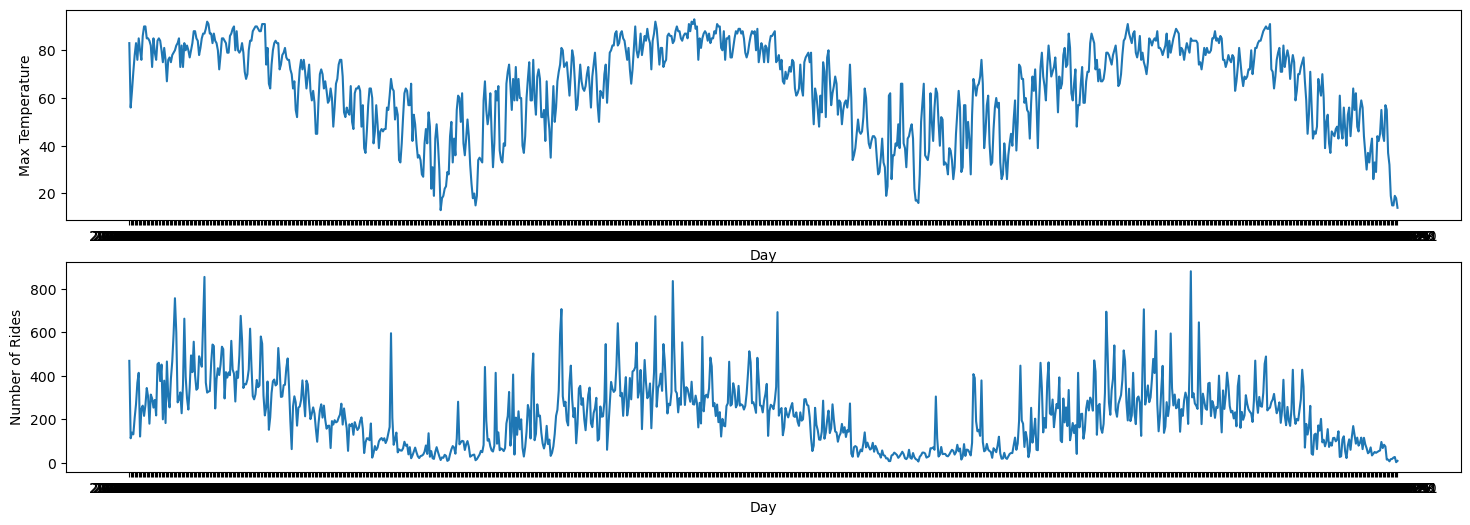

In [4]:
df_temp_rides = df.set_index('Date')[['Max Temp','n_rides']]
fig, axs = plt.subplots(2, 1, figsize=(18,6))
plot_temp = axs[0]
plot_rides = axs[1]
plot_temp.set_xlabel('Day')
plot_temp.set_ylabel('Max Temperature')
plot_temp.plot(df_temp_rides['Max Temp'])
plot_rides.set_xlabel('Day')
plot_rides.set_ylabel('Number of Rides')
plot_rides.plot(df_temp_rides['n_rides'])
plt.show()

# Grid search with a gradient boosting regressor

Lastly, we apply a grid search using a gradient boosting regressor to see how strongly each variable contributes to the `n_rides` prediction. We take 20% of the dataset to train and then validate the estimator scores returned from the grid search.

In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
X = pd.get_dummies(df, columns=['Month'], drop_first=True).drop(['Date','n_rides'], axis='columns')
y = df['n_rides']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [7]:
model = make_pipeline(MinMaxScaler(), GradientBoostingRegressor())
params = {'gradientboostingregressor__max_depth': range(3, 20)}
grid = GridSearchCV(model, params, cv=5)

grid.fit(X_train, y_train)

grid.best_estimator_.score(X_valid, y_valid)

0.7485961845140214

In [8]:
grid.best_params_

{'gradientboostingregressor__max_depth': 3}

# Visualize the feature importances

Lastly, we extract the feature importances from the best estimator discovered by the grid search. We can see that the best estimator also ranks maximum temperator as the most important feature.

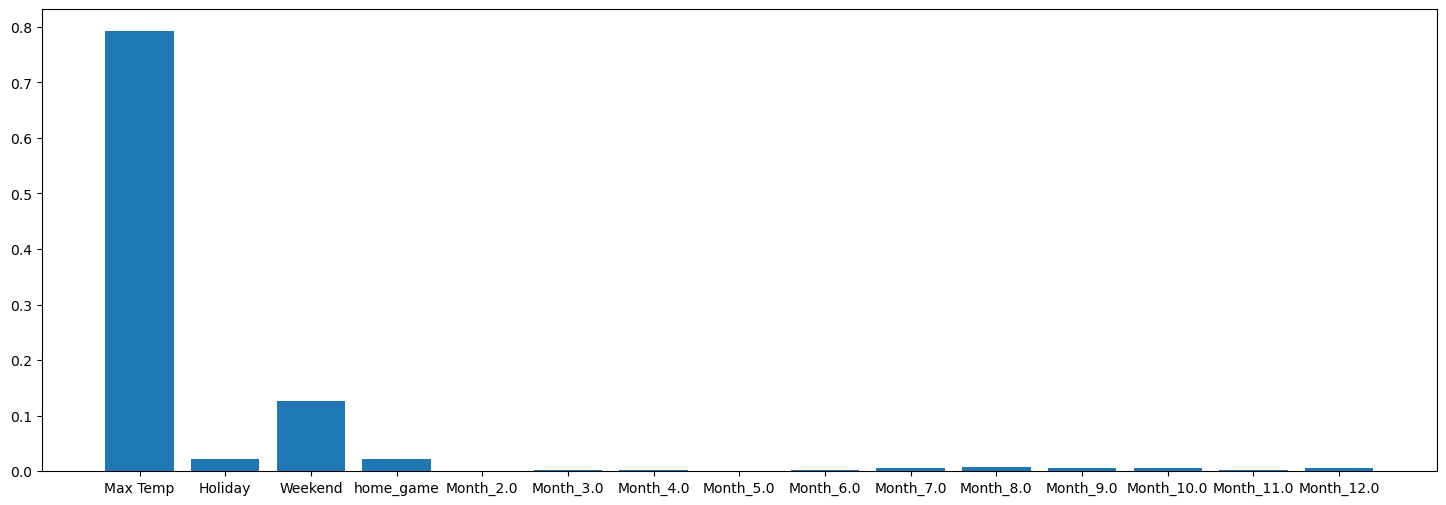

In [9]:
variances = grid.best_estimator_.named_steps['gradientboostingregressor'].feature_importances_
series = pd.Series(variances, index=X.columns, name='Explained Variances')
plt.figure(figsize=(18,6))
plt.bar(series.index,series)
plt.show()